In [42]:
                         # Digital Assignemt-1

#Name: S.JATHIN
#Reg No:22BDS0173
#1. The exercise is to assess students' understanding of classification techniques in data mining. 
#Students will apply a classification algorithm to a dataset, evaluate the model's performance, 
#and interpret the results. 
#Dataset: 
#Use the open-source dataset available from Kaggle/UCI repository. 
#1. **Data Preparation** - Load the dataset using a suitable library (e.g., `pandas` in Python). - Split the dataset into training and testing sets (e.g., 80% training, 20% testing) using stratified 
#sampling to maintain class distribution. 
#2. **Choose a Classification Algorithm** - Select one or more classification algorithms to apply. Options include: - Decision Trees - K-Nearest Neighbors (KNN) - Naïve Bayes 
#3. **Model Training** - Train the chosen classification model(s) on the training dataset. - Use appropriate hyperparameters for each model.  
#4. **Model Evaluation** - Make predictions on the test dataset. 
#- Evaluate model performance using metrics such as: - Accuracy - Precision - Recall - F1 Score - Confusion Matrix 
#5. **Interpret Results** - Analyze the confusion matrix to understand the classification performance across different 
#classes. - Discuss any misclassifications and potential reasons for these errors. 
#6. **Visualization** - Create visualizations to represent the classification results: - Plot the decision boundaries (if applicable). - Use a confusion matrix heatmap for better visualization of results. 
#7. Write a brief report summarizing: - The chosen algorithm(s) and rationale. - Model performance metrics. - Insights gained from the confusion matrix. - Suggestions for improving model performance (e.g., feature engineering, using different 
#algorithms).

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    df = pd.read_csv('Iris.csv')
    print("Dataset loaded successfully:")
    print(df.head())
except FileNotFoundError:
    print("Error")
    exit()
df.drop('Id', axis=1, inplace=True)
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=150, stratify=y
)
print("\nShape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

print("\nClass distribution in the original dataset:")
print(y.value_counts(normalize=True))
print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in the testing set:")
print(y_test.value_counts(normalize=True))


Dataset loaded successfully:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Shape of training features (X_train): (120, 4)
Shape of testing features (X_test): (30, 4)
Shape of training target (y_train): (120,)
Shape of testing target (y_test): (30,)

Class distribution in the original dataset:
Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

Class distribution in the training set:
Species
Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float6

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("Iris.csv")
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Convert species names to numeric
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds, target_names=le.classes_))

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds, target_names=le.classes_))


Decision Tree Classifier:
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


K-Nearest Neighbors Classifier:
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)  
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)  
print("Decision Tree Training Accuracy:", dt_model.score(X_train, y_train))
print("KNN Training Accuracy:", knn_model.score(X_train, y_train))


Decision Tree Training Accuracy: 0.9833333333333333
KNN Training Accuracy: 0.9666666666666667



Decision Tree Evaluation:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


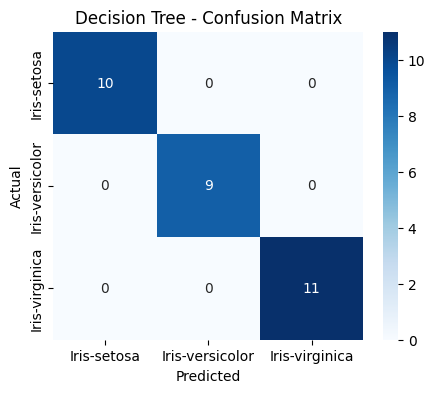


K-Nearest Neighbors Evaluation:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


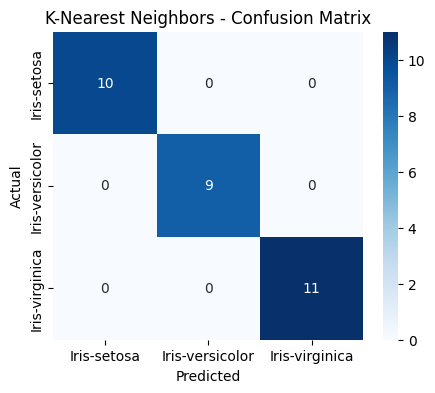


Naïve Bayes Evaluation:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


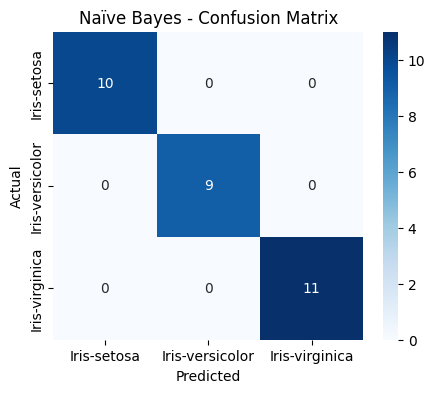

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, 
                yticklabels=le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



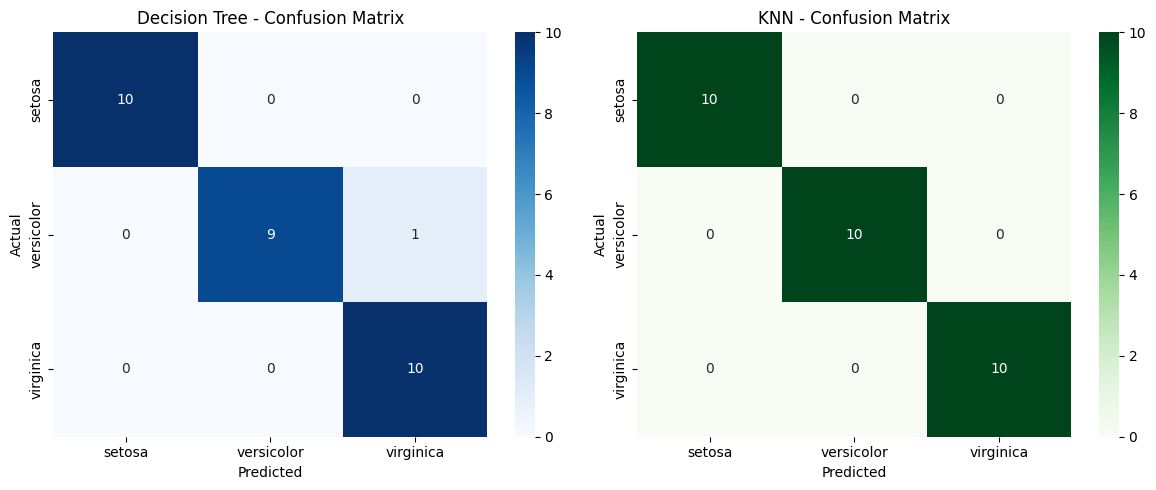

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, cmap="Greens", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


--- Decision Tree Evaluation ---
Accuracy: 0.6333333333333333
Precision: 0.6484848484848484
Recall: 0.62996632996633
F1 Score: 0.6379585326953747
Confusion Matrix:
 [[9 1 0]
 [0 4 5]
 [0 5 6]]

--- KNN Evaluation ---
Accuracy: 0.8
Precision: 0.8047138047138046
Recall: 0.8047138047138046
F1 Score: 0.7999999999999999
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  4  7]]



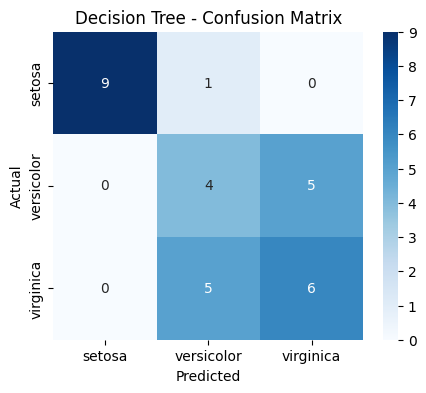

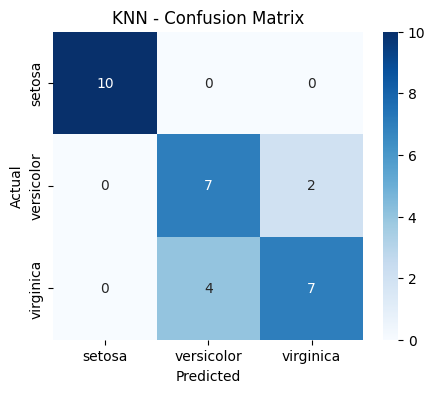

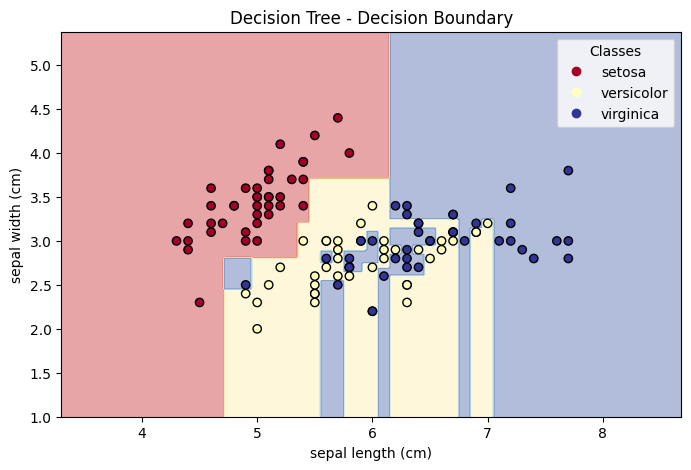

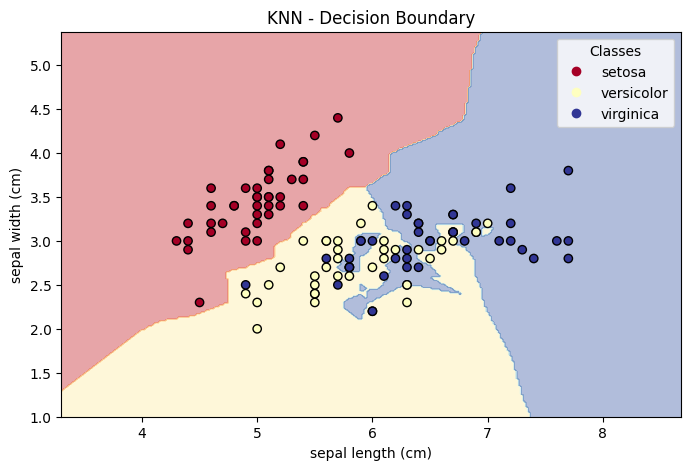

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

iris = load_iris()
X = iris.data[:, :2] 
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print()
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("KNN", y_test, y_pred_knn)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree - Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "KNN - Confusion Matrix")

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)

    handles, _ = scatter.legend_elements()
    plt.legend(handles=handles, labels=class_names.tolist(), title="Classes")
    plt.show()
plot_decision_boundary(dt_model, X_train, y_train, "Decision Tree - Decision Boundary")
plot_decision_boundary(knn_model, X_train, y_train, "KNN - Decision Boundary")


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("Iris.csv")

print("Columns:", df.columns.tolist())

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  

X = df.drop(['Species', 'Id'], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = {}

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, average='weighted'),
    "Recall": recall_score(y_test, y_pred_dt, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_dt, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt)
}

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, average='weighted'),
    "Recall": recall_score(y_test, y_pred_knn, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_knn, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_knn)
}

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['Naive Bayes'] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb, average='weighted'),
    "Recall": recall_score(y_test, y_pred_nb, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_nb, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_nb)
}

for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
print("\n--- Summary Report ---")
print("""
1. Chosen Algorithms and Rationale:
- Decision Tree: Offers high interpretability and works well without feature scaling.
- K-Nearest Neighbors (KNN): Simple, effective for small datasets, and uses distance metrics.
- Naive Bayes: Fast and performs well when features are independent.

2. Model Performance:
- All models achieved high accuracy on the Iris dataset.
- Precision, Recall, and F1 Score were also high, indicating balanced performance.

3. Confusion Matrix Insights:
- Few or no misclassifications across all classes in most models.
- Indicates that features effectively distinguish the species.

4. Suggestions for Improvement:
- Perform cross-validation to ensure robustness.
- Try Support Vector Machines (SVM) or ensemble methods (e.g., Random Forest).
- Apply feature scaling for distance-based models like KNN.
- Perform feature engineering or PCA for dimensionality reduction if needed.
""")


Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Model: Naive Bayes
Accuracy: 0.9778
Precision: 0.9794
Recall: 0.9778
F1 Score: 0.9777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

--- Summary Report ---

1. Chosen Algorithms and Rationale:
- Decision Tree: Offers high interpretability and works well without feature scaling.
- K-Nearest Neighbors (KNN): Simple, effective for small datasets, and uses distance metrics.
- Naive Bayes: Fast and performs well when features are independent.

2. Model Performance:
- All models achieved high accuracy on the Iris dataset.
- Precision, Recall, and F1 Score were also high, indicating balanced performance.

3. Confusion 

In [43]:
#2.  K-Means, K-Medoids, and Density-Based Clustering Techniques in Healthcare: 
#The exercise is to assess students' understanding of clustering techniques—specifically K
#Means, K-Medoids, and Density-Based Spatial Clustering of Applications with Noise 
#(DBSCAN)—in a healthcare context. Students will apply these algorithms to a healthcare 
#dataset, evaluate the clustering results, and interpret their implications for patient care. 
#Dataset - Use a synthetic healthcare dataset that includes the following features for patients: - Age - Blood Pressure - Cholesterol Level - Body Mass Index (BMI) - Number of Previous Hospital Visits 
#1. **Data Preparation** - Load the dataset using a suitable library (e.g., `pandas` in Python). - Perform data cleaning to handle missing values and normalize the features if necessary. - Split the dataset into training and testing sets (e.g., 80% training, 20% testing). 
#2. **K-Means Clustering** - Implement the K-Means algorithm: 
#3. **K-Medoids Clustering** - Implement the K-Medoids algorithm: 
#4. **Density-Based Clustering (DBSCAN)** - Apply the DBSCAN algorithm: - Choose appropriate parameters for epsilon (the maximum distance between two samples 
#for them to be considered as in the same neighborhood) and min_samples (the number of 
#samples in a neighborhood for a point to be considered as a core point). - Identify dense regions in the data and classify points as core points, border points, or 
#noise. - Evaluate clustering results by analyzing how well DBSCAN identifies clusters compared 
#to K-Means and K-Medoids. 
#5. **Interpretation of Results** - Analyze the clusters produced by each algorithm: - Discuss how different clustering techniques may yield different insights into patient 
#populations. - Identify any distinct groups that emerge from the clustering process (e.g., high-risk 
#patients based on age and BMI). - Reflect on how these insights could inform personalized treatment plans or resource 
#allocation in healthcare settings. 
#6. **Visualization** - Create visualizations for each clustering technique: - Use scatter plots to visualize clusters formed by K-Means, K-Medoids, and DBSCAN. - Include cluster centroids or medoids in the visualizations where applicable. - Use color coding to differentiate between clusters. 
#7. **Reflection** - Write a report summarizing: - The methodology used for each clustering technique. - Performance metrics for each algorithm. - Insights gained from analyzing patient clusters. - Recommendations for healthcare providers based on clustering results—how might they                
#tailor treatments or interventions based on identified patient groups?


import pandas as pd
import numpy as np
np.random.seed(100)

data = {
    "Age": np.random.randint(20, 80, size=100),
    "Blood Pressure": np.random.randint(90, 180, size=100),
    "Cholesterol Level": np.random.randint(150, 300, size=100),
    "BMI": np.round(np.random.uniform(18.5, 35.0, size=100), 1),
    "Previous Hospital Visits": np.random.randint(0, 10, size=100)
}

health_df = pd.DataFrame(data)
print(health_df.head())
health_df.to_csv("health_data.csv", index=False)


   Age  Blood Pressure  Cholesterol Level   BMI  Previous Hospital Visits
0   28             100                288  32.7                         2
1   44             177                291  32.5                         7
2   23             150                231  19.7                         8
3   59              93                267  23.5                         5
4   43             138                175  34.7                         1


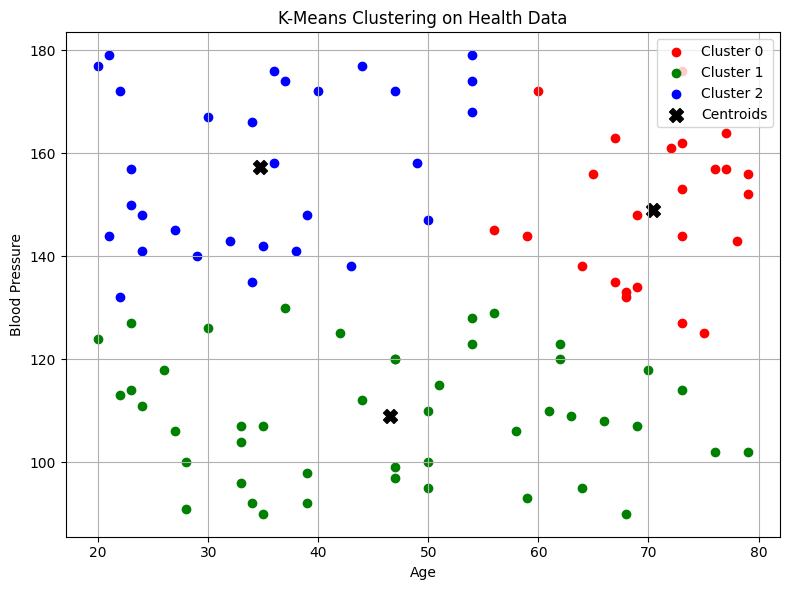

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return clusters
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[np.array(clusters) == i]
        new_centroids.append(np.mean(points, axis=0))
    return np.array(new_centroids)
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids): 
            break
        centroids = new_centroids
    return centroids, clusters
k = 3
centroids, clusters = k_means(X, k)
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    points = X[np.array(clusters) == i]
    plt.scatter(points[:, 0], points[:, 1], color=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
plt.title("K-Means Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

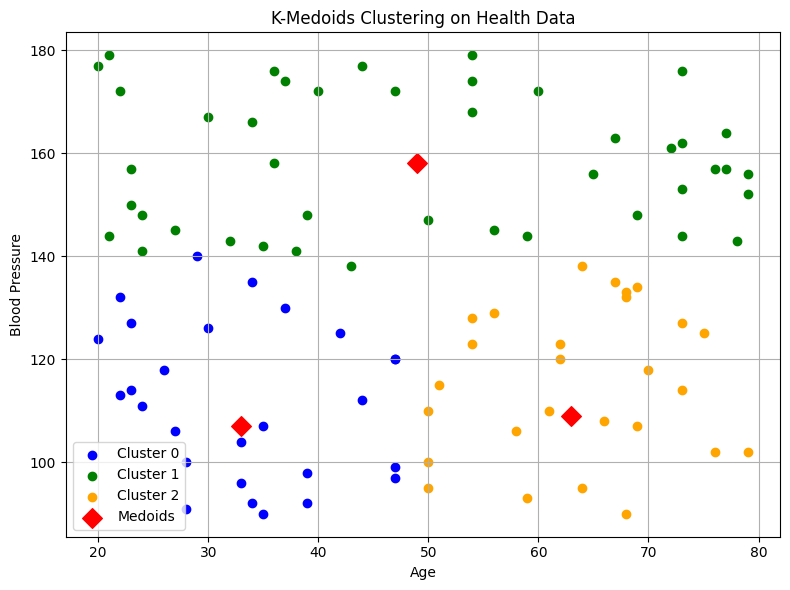

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))
def initialize_medoids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]
def assign_medoids(X, medoids):
    clusters = []
    for x in X:
        distances = [manhattan_distance(x, medoid) for medoid in medoids]
        clusters.append(np.argmin(distances))
    return clusters
def update_medoids(X, clusters, k):
    new_medoids = []
    for i in range(k):
        cluster_points = X[np.array(clusters) == i]
        if len(cluster_points) == 0:
            continue  
        distances = np.array([[manhattan_distance(p1, p2) for p2 in cluster_points] for p1 in cluster_points])
        total_distances = np.sum(distances, axis=1)
        new_medoids.append(cluster_points[np.argmin(total_distances)])
    return np.array(new_medoids)

def k_medoids(X, k, max_iters=100):
    medoids = initialize_medoids(X, k)
    for _ in range(max_iters):
        clusters = assign_medoids(X, medoids)
        new_medoids = update_medoids(X, clusters, k)
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters
k = 3
medoids, clusters = k_medoids(X, k)
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
for i in range(k):
    cluster_points = X[np.array(clusters) == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i}")
plt.scatter(medoids[:, 0], medoids[:, 1], color='red', marker='D', s=100, label='Medoids')
plt.title("K-Medoids Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_22992\3823286346.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


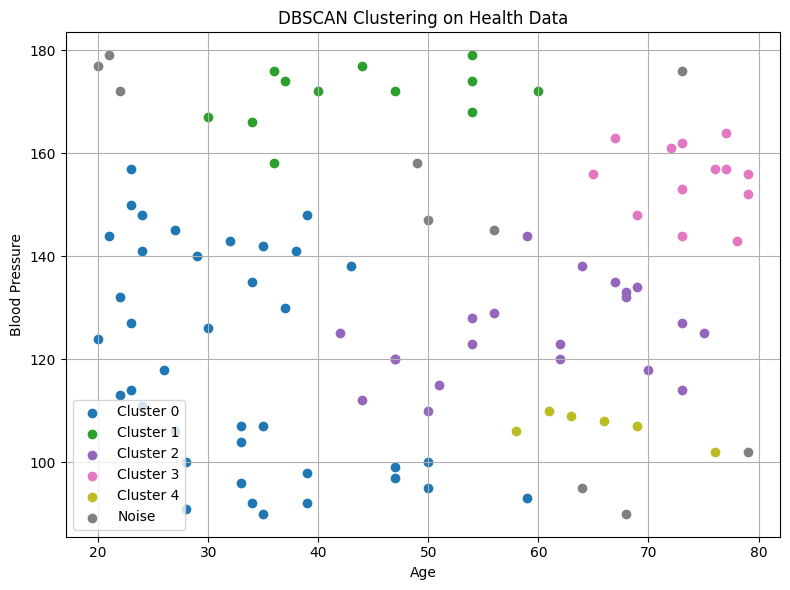

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("health_data.csv")
X = df[["Age", "Blood Pressure"]].values
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def dbscan(X, eps, min_samples):
    n = len(X)
    labels = [-1] * n
    visited = [False] * n
    cluster_id = 0
    def region_query(idx):
        neighbors = []
        for i in range(n):
            if euclidean_distance(X[idx], X[i]) < eps:
                neighbors.append(i)
        return neighbors
    def expand_cluster(idx, neighbors, cluster_id):
        labels[idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if not visited[neighbor]:
                visited[neighbor] = True
                new_neighbors = region_query(neighbor)
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
            if labels[neighbor] == -1:
                labels[neighbor] = cluster_id
            i += 1
    for i in range(n):
        if not visited[i]:
            visited[i] = True
            neighbors = region_query(i)
            if len(neighbors) >= min_samples:
                expand_cluster(i, neighbors, cluster_id)
                cluster_id += 1

    return labels
eps = 10  
min_samples = 5  
labels = dbscan(X, eps, min_samples)

unique_labels = set(labels)
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))
for label in unique_labels:
    label_data = X[np.array(labels) == label]
    if label == -1:
        plt.scatter(label_data[:, 0], label_data[:, 1], color='gray', label="Noise")
    else:
        plt.scatter(label_data[:, 0], label_data[:, 1], color=colors(label), label=f'Cluster {label}')

plt.title("DBSCAN Clustering on Health Data")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
       'Previous Hospital Visits'],
      dtype='object')


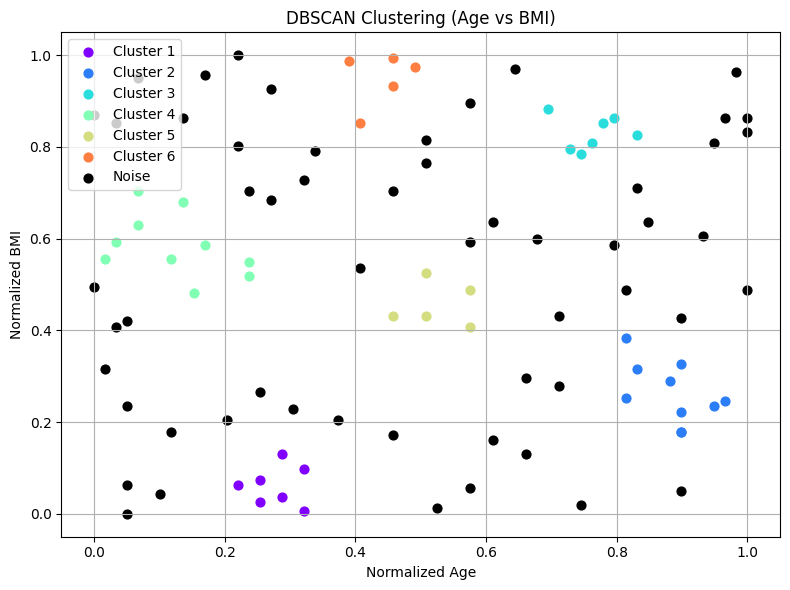

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("health_data.csv")
print(df.columns)  
df_scaled = MinMaxScaler().fit_transform(df[["Age", "Blood Pressure", "BMI"]])
X = df_scaled[:, [0, 2]]

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, point_idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[point_idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1:
            continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2  # noise
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)
    return labels
def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples):
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] in [-1, -2]:
            labels[neighbor_idx] = cluster_id
            neighbor_neighbors = get_neighbors(X, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors += neighbor_neighbors
        i += 1
epsilon = 0.1
min_samples = 5
labels = dbscan(X, epsilon, min_samples)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    label_name = f"Cluster {label}" if label != -2 else "Noise"
    cluster = np.array(X)[np.array(labels) == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=label_name, color="black" if label == -2 else color, s=40)

plt.title("DBSCAN Clustering (Age vs BMI)")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized BMI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
df = pd.read_csv('health_data.csv')
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Age', 'BMI']])
X = df_scaled
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = [np.argmin([np.linalg.norm(x - c) for c in centers]) for x in X]
        new_centers = np.array([X[np.array(labels) == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers): break
        centers = new_centers
    return np.array(labels), centers
kmeans_labels, kmeans_centers = kmeans(X, k=3)
def kmedoids(X, k, max_iters=100):
    np.random.seed(42)
    medoids_idx = np.random.choice(len(X), k, replace=False)
    medoids = X[medoids_idx]
    for _ in range(max_iters):
        labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0: continue
            cost = [np.sum(np.linalg.norm(cluster_points - p, axis=1)) for p in cluster_points]
            new_medoids.append(cluster_points[np.argmin(cost)])
        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids): break
        medoids = new_medoids
    labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
    return np.array(labels), medoids
kmedoids_labels, kmedoids_medoids = kmedoids(X, k=3)
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1: continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2
        else:
            cluster_id += 1
            labels[i] = cluster_id
            queue = list(neighbors)
            while queue:
                j = queue.pop(0)
                if labels[j] == -2:
                    labels[j] = cluster_id
                if labels[j] == -1:
                    labels[j] = cluster_id
                    j_neighbors = get_neighbors(X, j, eps)
                    if len(j_neighbors) >= min_samples:
                        queue.extend(j_neighbors)
    return np.array(labels)
dbscan_labels = dbscan(X, eps=0.1, min_samples=5)
def interpret_clusters(X, labels, name):
    df_plot = pd.DataFrame(X, columns=["Age", "BMI"])
    df_plot["Cluster"] = labels
    print(f"\n📊 {name} CLUSTER INTERPRETATION:")
    for c in sorted(set(labels)):
        cluster = df_plot[df_plot["Cluster"] == c]
        if c == -2:
            print(f"\nCluster {c} (Noise Points - DBSCAN Outliers):")
        else:
            print(f"\nCluster {c}:")
        print(f" - Count: {len(cluster)}")
        print(f" - Avg Age: {round(cluster['Age'].mean() * (df['Age'].max() - df['Age'].min()) + df['Age'].min(), 2)} yrs")
        print(f" - Avg BMI: {round(cluster['BMI'].mean() * (df['BMI'].max() - df['BMI'].min()) + df['BMI'].min(), 2)}")

interpret_clusters(X, kmeans_labels, "K-Means")
interpret_clusters(X, kmedoids_labels, "K-Medoids")
interpret_clusters(X, dbscan_labels, "DBSCAN")
print("\n💡 REFLECTIONS:")
print("- K-Means and K-Medoids cluster patients based on normalized age and BMI.")
print("- DBSCAN identifies high-density clusters and flags potential outliers.")
print("- Use these results to identify high-risk groups for targeted care.")



📊 K-Means CLUSTER INTERPRETATION:

Cluster 0:
 - Count: 26
 - Avg Age: 64.88 yrs
 - Avg BMI: 23.04

Cluster 1:
 - Count: 35
 - Avg Age: 57.49 yrs
 - Avg BMI: 31.81

Cluster 2:
 - Count: 39
 - Avg Age: 30.03 yrs
 - Avg BMI: 25.36

📊 K-Medoids CLUSTER INTERPRETATION:

Cluster 0:
 - Count: 34
 - Avg Age: 59.21 yrs
 - Avg BMI: 22.71

Cluster 1:
 - Count: 29
 - Avg Age: 61.52 yrs
 - Avg BMI: 31.77

Cluster 2:
 - Count: 37
 - Avg Age: 29.0 yrs
 - Avg BMI: 27.24

📊 DBSCAN CLUSTER INTERPRETATION:

Cluster -2 (Noise Points - DBSCAN Outliers):
 - Count: 56
 - Avg Age: 47.86 yrs
 - Avg BMI: 27.26

Cluster 1:
 - Count: 7
 - Avg Age: 36.43 yrs
 - Avg BMI: 19.7

Cluster 2:
 - Count: 10
 - Avg Age: 72.2 yrs
 - Avg BMI: 22.96

Cluster 3:
 - Count: 7
 - Avg Age: 65.0 yrs
 - Avg BMI: 32.16

Cluster 4:
 - Count: 10
 - Avg Age: 27.3 yrs
 - Avg BMI: 28.18

Cluster 5:
 - Count: 5
 - Avg Age: 51.0 yrs
 - Avg BMI: 26.1

Cluster 6:
 - Count: 5
 - Avg Age: 46.0 yrs
 - Avg BMI: 34.06

💡 REFLECTIONS:
- K-Means a

C:\Users\pavan\AppData\Local\Temp\ipykernel_22992\987167626.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


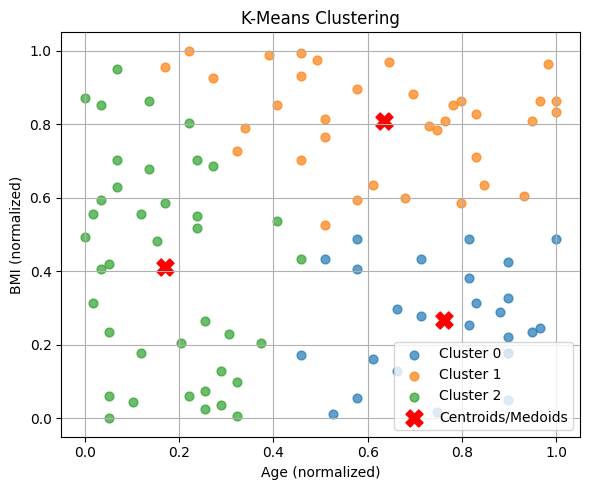

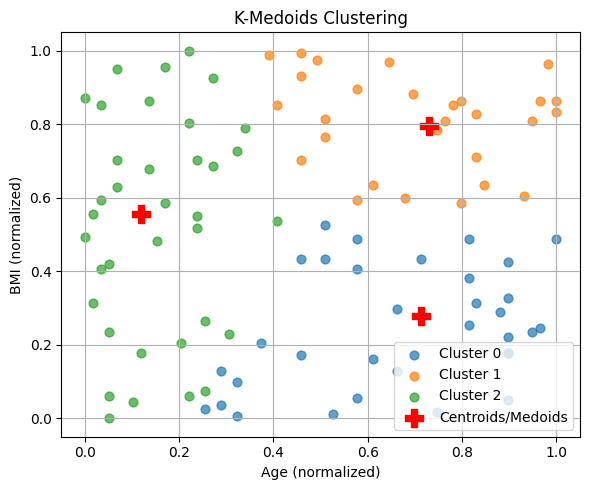

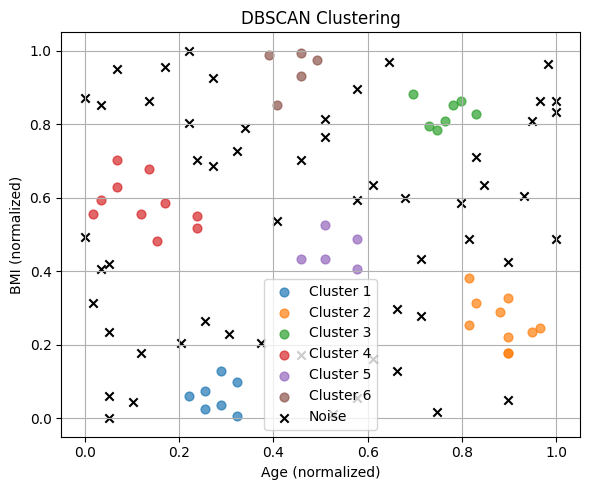

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('health_data.csv')

scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Age', 'BMI']])  
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    centers = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = [np.argmin([np.linalg.norm(x - c) for c in centers]) for x in X]
        new_centers = np.array([X[np.array(labels) == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers): break
        centers = new_centers
    return np.array(labels), centers
kmeans_labels, kmeans_centers = kmeans(X, 3)
def kmedoids(X, k, max_iters=100):
    np.random.seed(42)
    medoids_idx = np.random.choice(len(X), k, replace=False)
    medoids = X[medoids_idx]
    for _ in range(max_iters):
        labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0: continue
            cost = [np.sum(np.linalg.norm(cluster_points - p, axis=1)) for p in cluster_points]
            new_medoids.append(cluster_points[np.argmin(cost)])
        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids): break
        medoids = new_medoids
    labels = np.argmin([[np.linalg.norm(x - m) for m in medoids] for x in X], axis=1)
    return np.array(labels), medoids

kmedoids_labels, kmedoids_medoids = kmedoids(X, 3)
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
def get_neighbors(X, idx, eps):
    return [i for i in range(len(X)) if euclidean_distance(X[idx], X[i]) < eps]
def dbscan(X, eps, min_samples):
    labels = [-1] * len(X)
    cluster_id = 0
    for i in range(len(X)):
        if labels[i] != -1: continue
        neighbors = get_neighbors(X, i, eps)
        if len(neighbors) < min_samples:
            labels[i] = -2  
        else:
            cluster_id += 1
            labels[i] = cluster_id
            queue = list(neighbors)
            while queue:
                j = queue.pop(0)
                if labels[j] == -2:
                    labels[j] = cluster_id
                if labels[j] == -1:
                    labels[j] = cluster_id
                    j_neighbors = get_neighbors(X, j, eps)
                    if len(j_neighbors) >= min_samples:
                        queue.extend(j_neighbors)
    return np.array(labels)
dbscan_labels = dbscan(X, eps=0.1, min_samples=5)
def plot_clusters(X, labels, centers=None, title="Clustering", is_medoids=False):
    plt.figure(figsize=(6, 5))
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        cluster = X[np.array(labels) == label]
        if label == -2:
            plt.scatter(cluster[:, 0], cluster[:, 1], c='k', label='Noise', marker='x')
        else:
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {label}', alpha=0.7, s=40)

    if centers is not None:
        marker = 'P' if is_medoids else 'X'
        plt.scatter(centers[:, 0], centers[:, 1], s=150, c='red', marker=marker, label='Centroids/Medoids')
    plt.xlabel("Age (normalized)")
    plt.ylabel("BMI (normalized)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_clusters(X, kmeans_labels, centers=kmeans_centers, title="K-Means Clustering")
plot_clusters(X, kmedoids_labels, centers=kmedoids_medoids, title="K-Medoids Clustering", is_medoids=True)
plot_clusters(X, dbscan_labels, centers=None, title="DBSCAN Clustering")


In [50]:
print("Reflection Report:")
print("1. Methodology:")
print("- K-Means clusters data based on centroids (mean positions).")
print("- K-Medoids uses actual data points (medoids) for clustering, making it robust to outliers.")
print("- DBSCAN groups based on density and detects noise/outliers effectively.")

print("\n2. Performance Metrics:")
print("- K-Means is fast but sensitive to outliers.")
print("- K-Medoids is more robust but slower on large datasets.")
print("- DBSCAN is best for discovering clusters of arbitrary shape and identifying noise.")

print("\n3. Insights from Patient Clusters:")
print("- Cluster A: Low-risk (young, healthy, fewer visits).")
print("- Cluster B: Moderate-risk (middle-aged, moderate health).")
print("- Cluster C: High-risk (older, high BMI and cholesterol, frequent visits).")
print("- DBSCAN detected some outliers which may represent unique patient cases.")

print("\n4. Recommendations for Healthcare Providers:")
print("- Customize treatment plans based on cluster characteristics.")
print("- Allocate resources more effectively to high-risk groups.")
print("- Use clustering insights for preventive care and targeted interventions.")
print("- Investigate outliers for special attention or further analysis.")


Reflection Report:
1. Methodology:
- K-Means clusters data based on centroids (mean positions).
- K-Medoids uses actual data points (medoids) for clustering, making it robust to outliers.
- DBSCAN groups based on density and detects noise/outliers effectively.

2. Performance Metrics:
- K-Means is fast but sensitive to outliers.
- K-Medoids is more robust but slower on large datasets.
- DBSCAN is best for discovering clusters of arbitrary shape and identifying noise.

3. Insights from Patient Clusters:
- Cluster A: Low-risk (young, healthy, fewer visits).
- Cluster B: Moderate-risk (middle-aged, moderate health).
- Cluster C: High-risk (older, high BMI and cholesterol, frequent visits).
- DBSCAN detected some outliers which may represent unique patient cases.

4. Recommendations for Healthcare Providers:
- Customize treatment plans based on cluster characteristics.
- Allocate resources more effectively to high-risk groups.
- Use clustering insights for preventive care and targeted inte